# 6.1 결정 트리 학습과 시각화
### 결정 트리 학습과 시각화
- Root node: 깊이가 0인 맨 꼭대기의 노드
- Leaf node: 자식 노드를 가지지 않는 노드
- samples 속성: 얼마나 많은 훈련 샘플이 적용되었는지
- value 속성: 노드에서 각 클래스에 얼마나 많은 훈련 샘플이 있는지
- Gini 속성: 불순도 측정

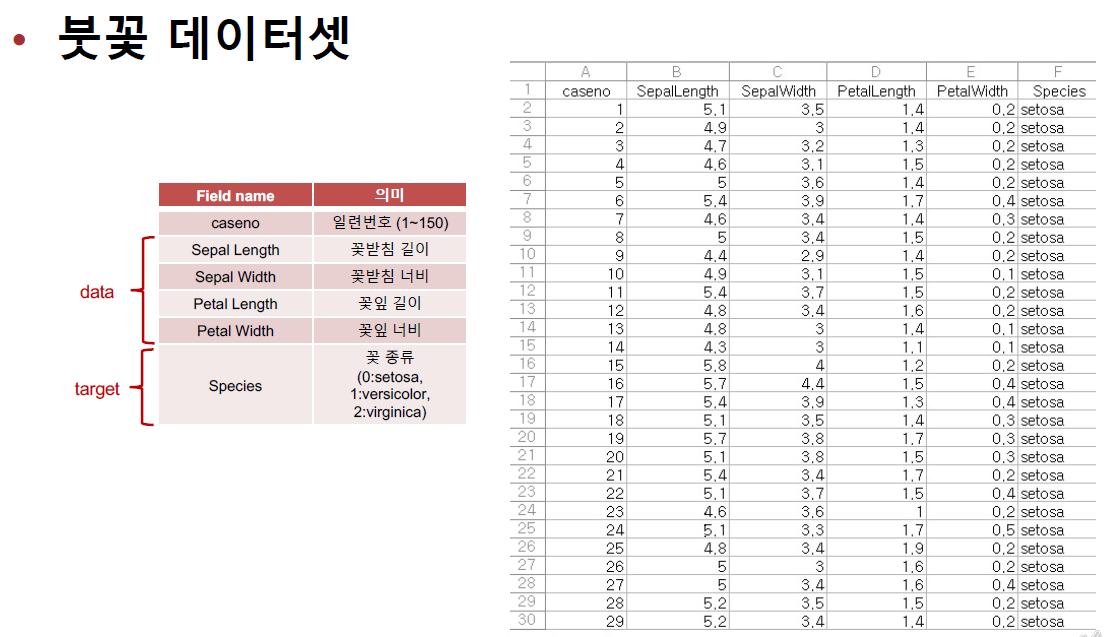

### 결정 트리 학습

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()        #데이터 로드
X = iris.data[:, 2:]      #꽃잎의 길이와 너비
y = iris.target           #꽃 종류를 정답값 y로 설정

tree_clf = DecisionTreeClassifier(max_depth=2)     #깊이 2인 결정 트리 분류기 생성
tree_clf.fit(X, y)                                 #데이터 X와 정답값 y를 사용하여 분류기 학습

DecisionTreeClassifier(max_depth=2)

In [4]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

### 결정 트리 시각화

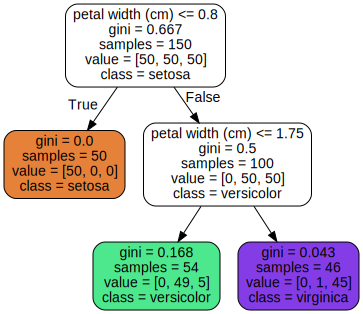

In [5]:
from graphviz import Source

Source.from_file("iris_tree.dot")

# 6.2 예측하기
### 결정 트리 학습과 시각화
- Gini 속성: 불순도 측정
 - 한 노드의 모든 샘플이 같은 클래스에 속해 있다면 이 노드를 순수(gini=0)하다고 함
 
$ G_i = 1 - \sum_{k=1}^{n}{P_{i,k}}^2 $

$P_{i,k}$는 $i$번째 노드에 있는 훈련 샘플 중 클래스 $k$에 속한 샘플의 비율

- 결정 트리의 장점: 데이터 전처리가 거의 필요하지 않음
 - 특성이 스케일을 맞추거나 평균을 원점에 맞추는 작업이 필요하지 않음

### 엔트로피(entropy)
- 열역학: 분자의 무질서함을 측정하는 수치로 분자가 안정되고 질서 정연하면 엔트로피가 0에 가까움
- 정보이론: 메시지의 평균 정보 양을 측정하는 것으로 모든 메시지가 동일할 때 엔트로피가 0이 됨
- 다른 트리가 만들어지는 경우, 지니 불순도가 가장 빈도 높은 클래스를 한 쪽 가지(branch)로 고립시키는 경향이 있는 반면 엔트로피는 좀 더 균형 잡힌 트리를 만듦

# 6.3 클래스 확률 추정
### 결정 트리는 한 샘플이 특정 클래스 k에 속할 확률을 추정할 수 있음
- 샘플에 대해 leaf node를 찾기 위해 트리를 탐색함
- 노드에 있는 클래스 k의 훈련 샘플의 비율을 반환함
- ex. 길이가 5cm이고 너비가 1.5cm인 꽃잎을 발견했다고 가정
 - first group: 0% (0/54)
 - second group: 90.7% (49/54)
 - third group: 9.3% (5/54)

### 한 샘플이 특정 클래스 k에 속할 확률을 추정

In [6]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [7]:
tree_clf.predict([[5, 1.5]])

array([1])

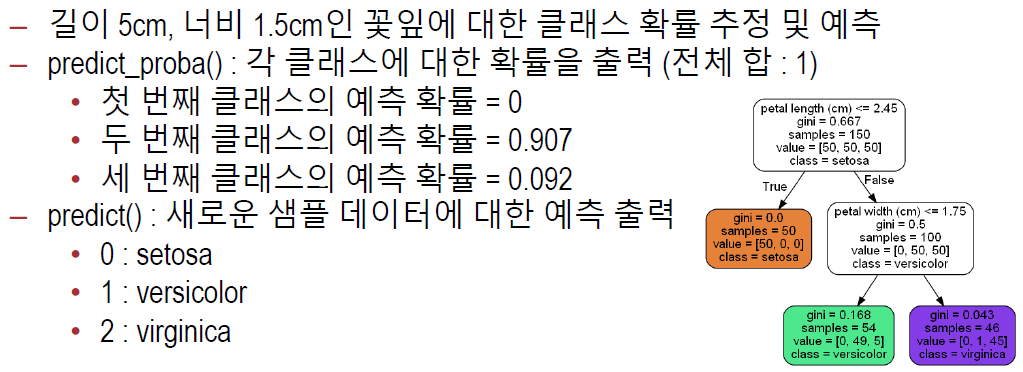

# 6.4 CART 훈련 알고리즘
### CART(Classification and Regression Tree)
- 훈련 세트를 하나의 특성 $k$의 임계값 $t_k$를 사용해 두 개의 서브셋으로 나눔
- (크기에 따른 가중치가 적용된) 가장 순수한(gini=0에 가까운) 서브셋으로 나눌 수 있는 $(k, t_k)$짝을 찾음
- 최대 깊이가 되면 중단 or 불순도를 줄이는 분할을 찾을 수 없을 때 중단

$$ J(k, t_k) = { m_{left} \over m}G_{left} + {m_{right}\over m}G_{right} $$
- $G_{left/right}$는 왼쪽/오른쪽 서브셋의 불순도
- $m_{left/right}$는 왼쪽/오른쪽 서브셋의 샘플 수